# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 11.11.2021

Мягий дедлайн: 23:59MSK 23.11.2021

Жестокий дедлайн: 23:59MSK 26.11.2021

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/31332/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

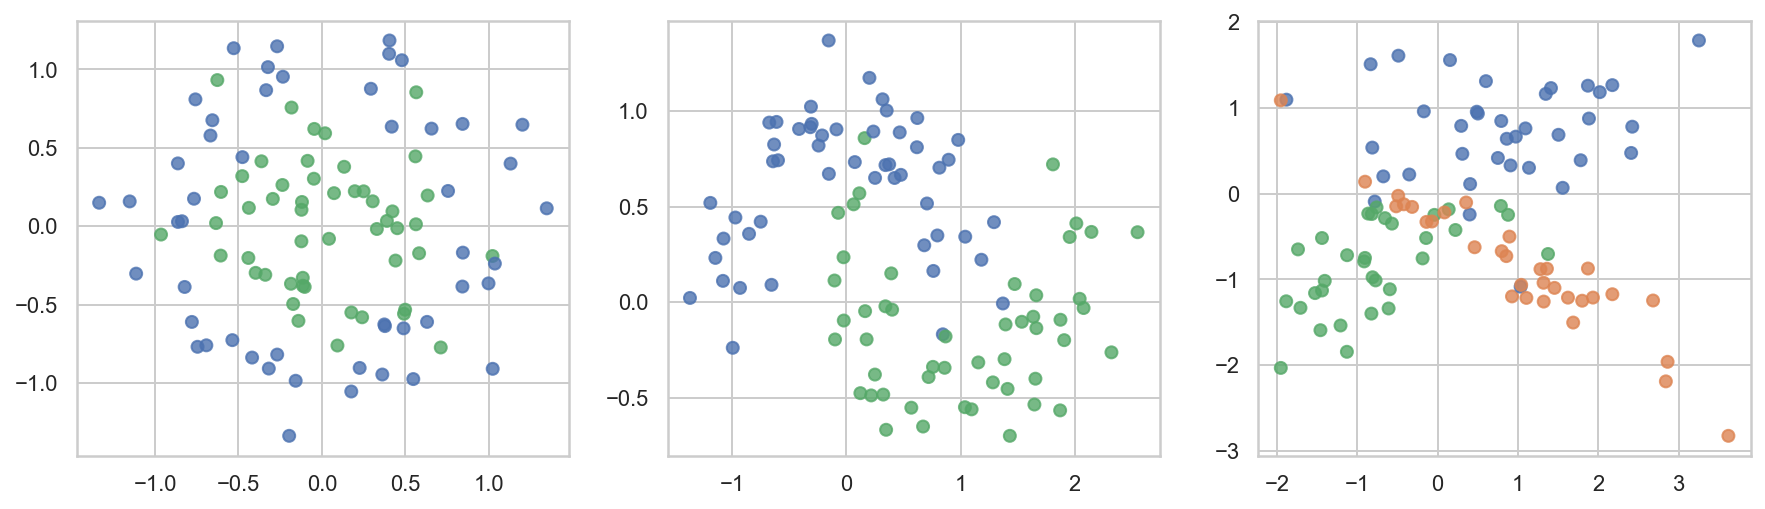

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

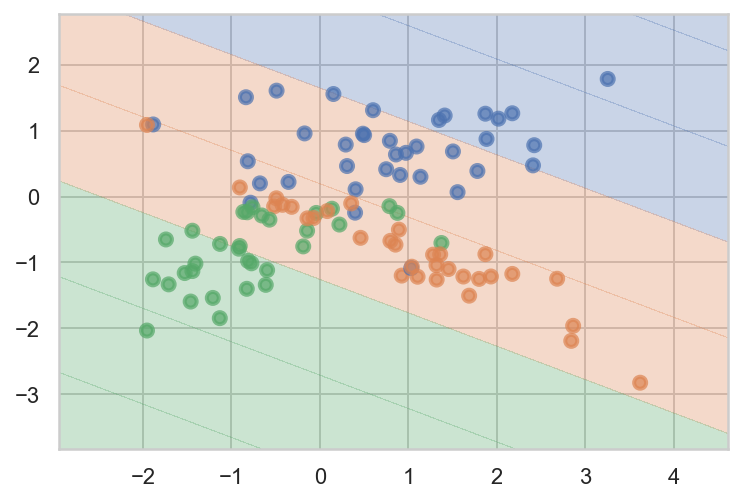

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Dataset 1


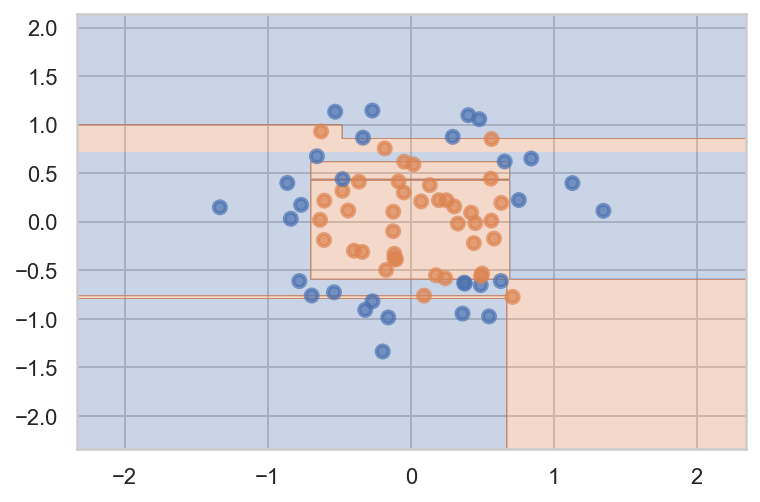

train accuracy: 1.0
test accuracy: 0.7666666666666667
Dataset 2


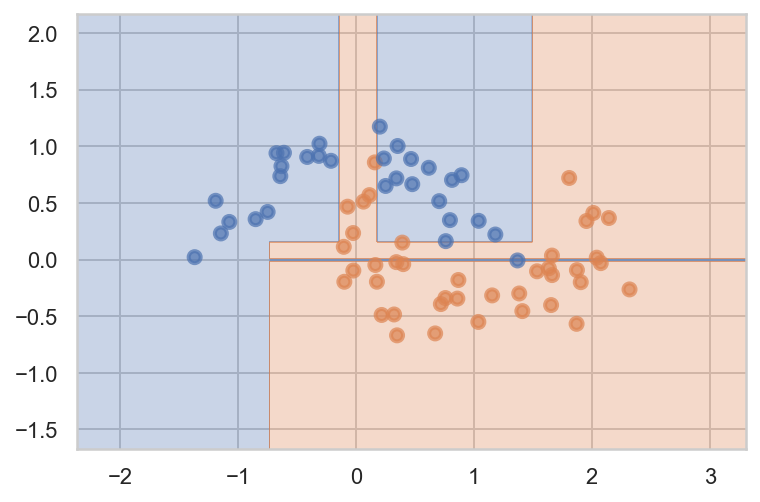

train accuracy: 1.0
test accuracy: 0.8666666666666667
Dataset 3


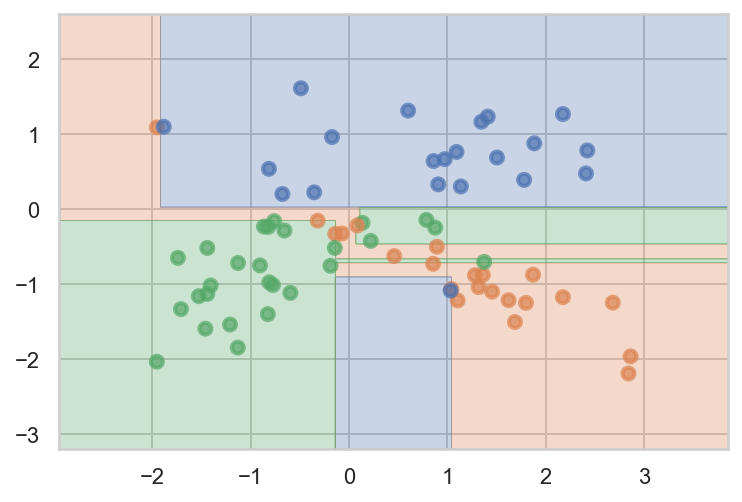

train accuracy: 1.0
test accuracy: 0.7666666666666667


In [8]:
for i in range(3):
    X, y = datasets[i]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)
    clf  = DecisionTreeClassifier().fit(X_train, y_train)
    print(f'Dataset {i+1}')
    plot_surface(clf, X_train, y_train)
    plt.show()
    print(f'train accuracy: {accuracy_score(clf.predict(X_train), y_train)}')
    print(f'test accuracy: {accuracy_score(clf.predict(X_test), y_test)}')

__Ответ:__
Результат получился довольно неплохой - `accuracy` во всех случаях превышает 0.8. При этом отчетливо видно, что `accuracy` на тренировочной выборке - единица, а поскольку в наших датасетах классы заползают друг на друга, это может говорить о переобучении. Так и есть - на каждом графике разделения видно, что на территории одного класса часто возникают зоны другого, появившиеся там из-за выбросов. Деревья переобучились, но не очень сильно, поскольку датасеты небольшие и выбросов в них не очень много.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [9]:
max_depths = [3, 4, 5, 6]
min_samples_leaves = [5, 7, 9, 11]

Dataset 1
Max dept: 3; Min samples in leaf: 5


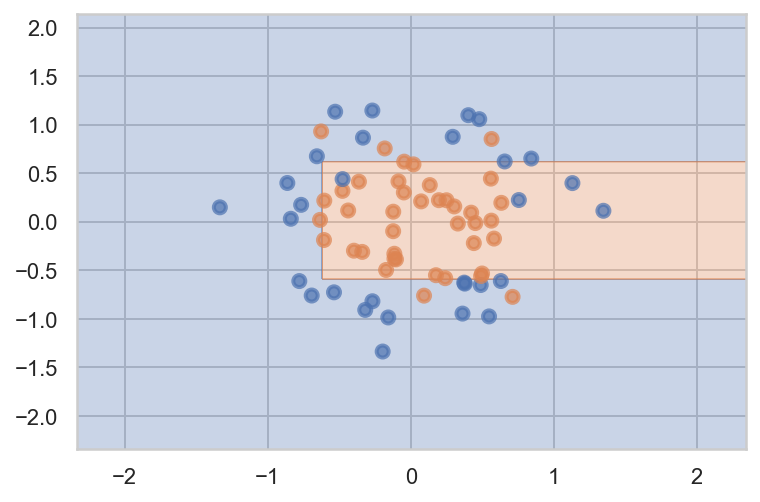

train accuracy: 0.8571428571428571
test accuracy: 0.8

Max dept: 3; Min samples in leaf: 7


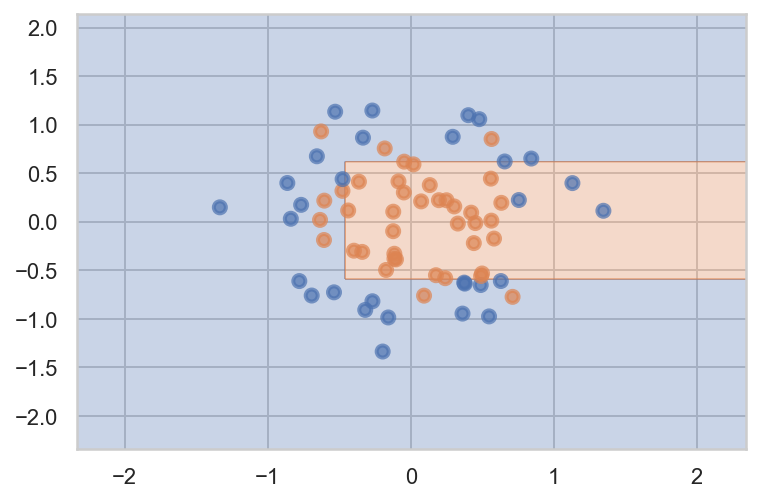

train accuracy: 0.8285714285714286
test accuracy: 0.8

Max dept: 3; Min samples in leaf: 9


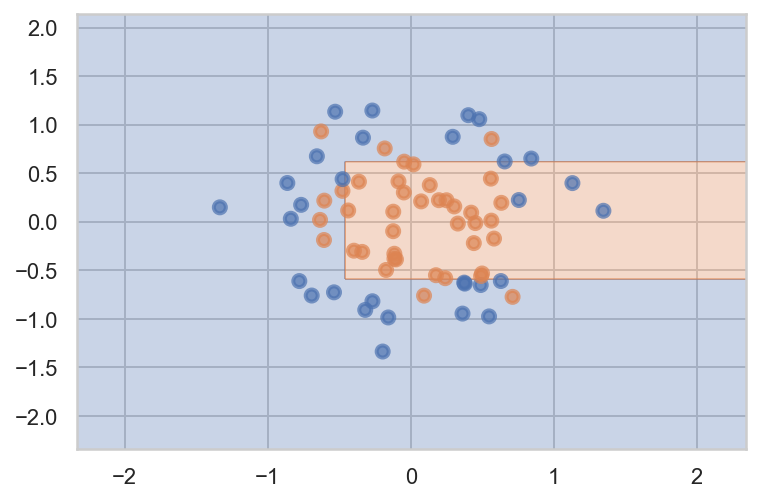

train accuracy: 0.8285714285714286
test accuracy: 0.8

Max dept: 3; Min samples in leaf: 11


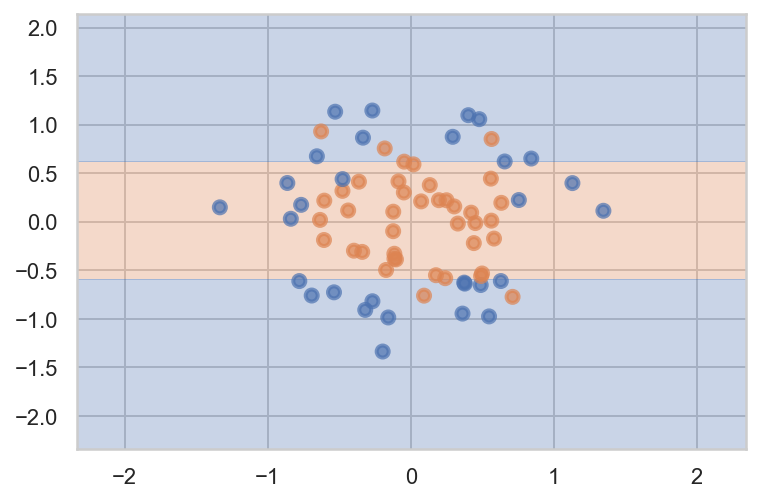

train accuracy: 0.8142857142857143
test accuracy: 0.6666666666666666

Max dept: 4; Min samples in leaf: 5


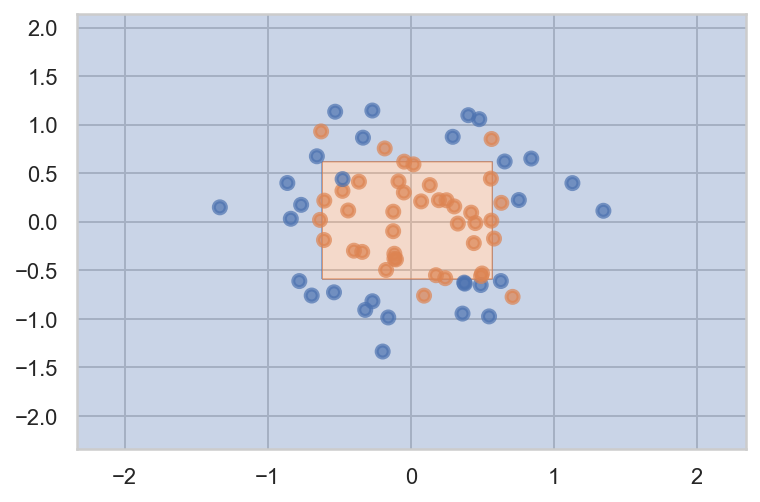

train accuracy: 0.8714285714285714
test accuracy: 0.9

Max dept: 4; Min samples in leaf: 7


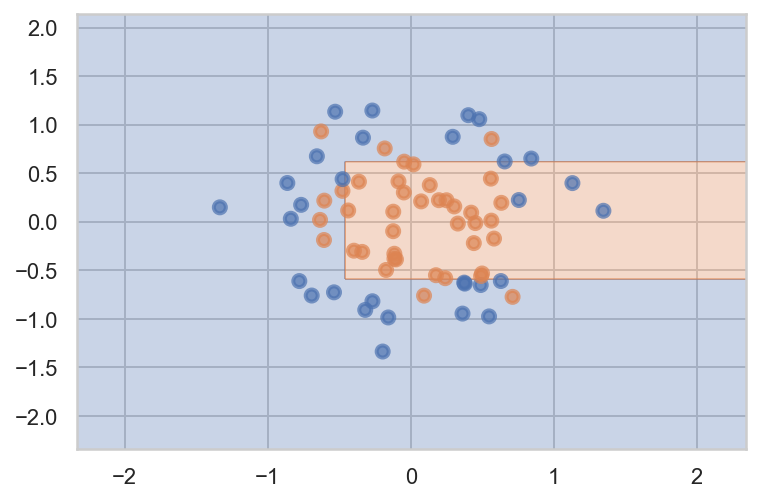

train accuracy: 0.8285714285714286
test accuracy: 0.8

Max dept: 4; Min samples in leaf: 9


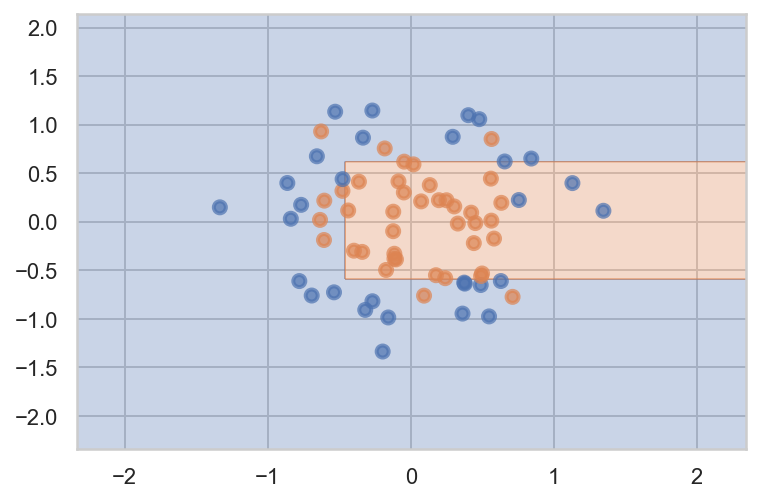

train accuracy: 0.8285714285714286
test accuracy: 0.8

Max dept: 4; Min samples in leaf: 11


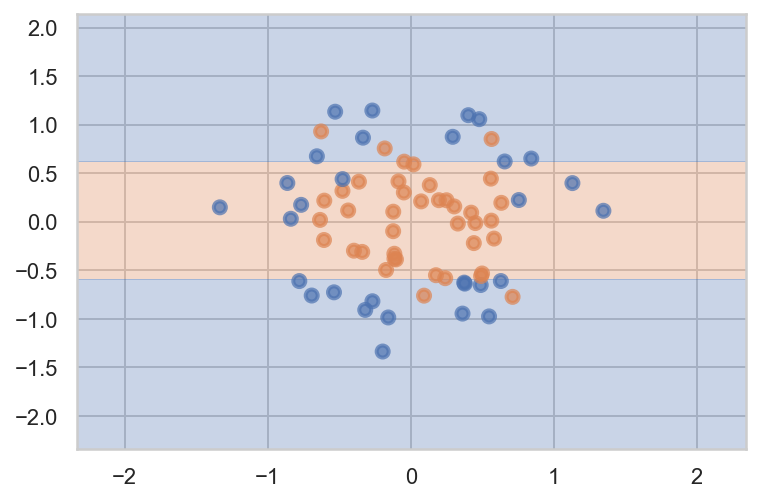

train accuracy: 0.8142857142857143
test accuracy: 0.6666666666666666

Max dept: 5; Min samples in leaf: 5


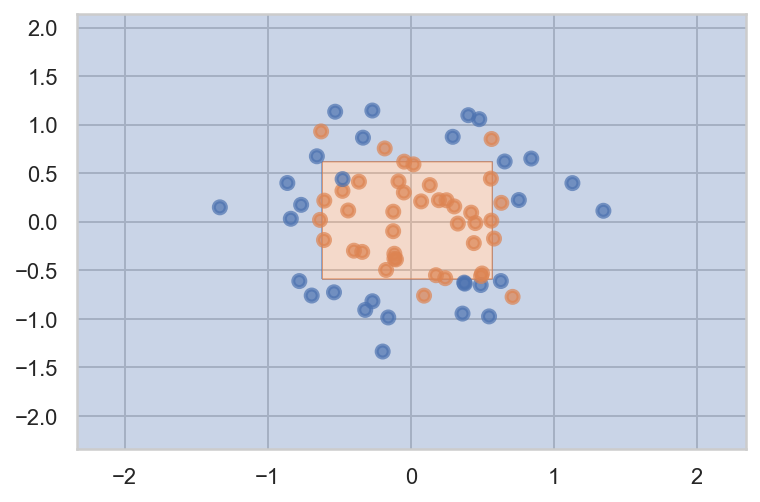

train accuracy: 0.8714285714285714
test accuracy: 0.9

Max dept: 5; Min samples in leaf: 7


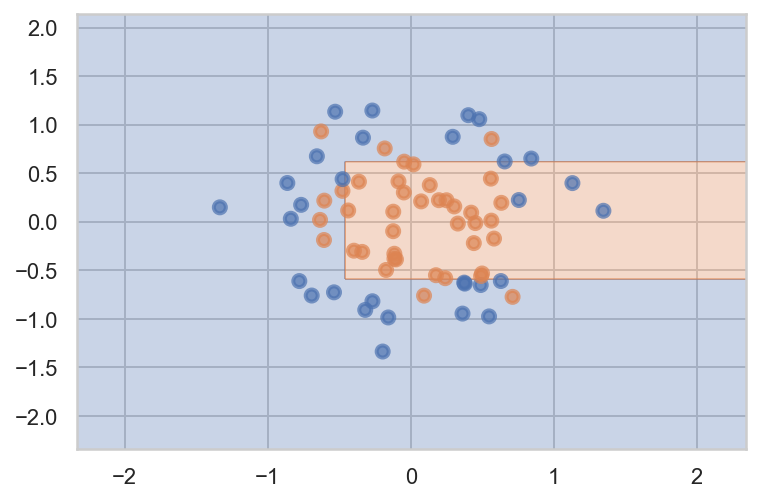

train accuracy: 0.8285714285714286
test accuracy: 0.8

Max dept: 5; Min samples in leaf: 9


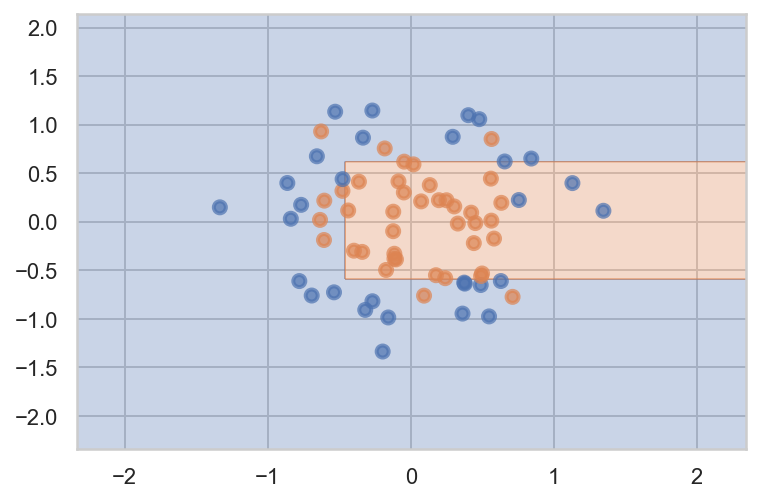

train accuracy: 0.8285714285714286
test accuracy: 0.8

Max dept: 5; Min samples in leaf: 11


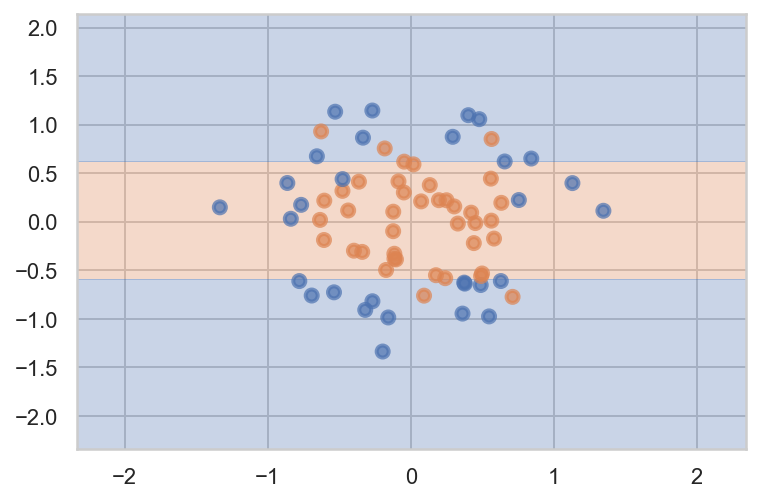

train accuracy: 0.8142857142857143
test accuracy: 0.6666666666666666

Max dept: 6; Min samples in leaf: 5


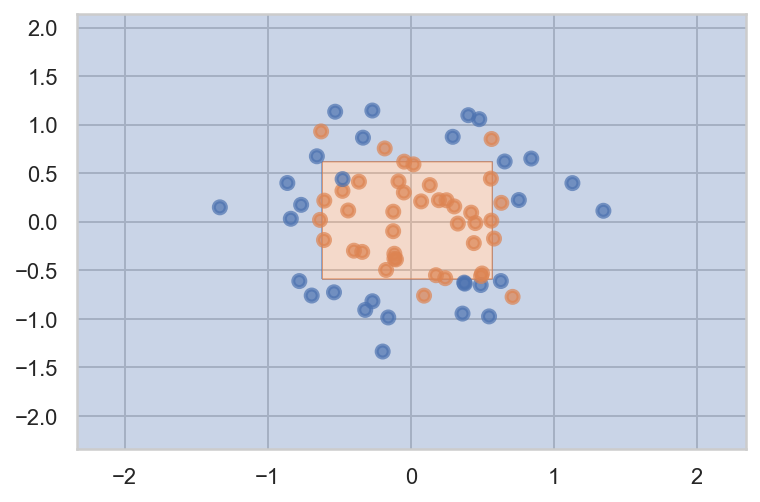

train accuracy: 0.8714285714285714
test accuracy: 0.9

Max dept: 6; Min samples in leaf: 7


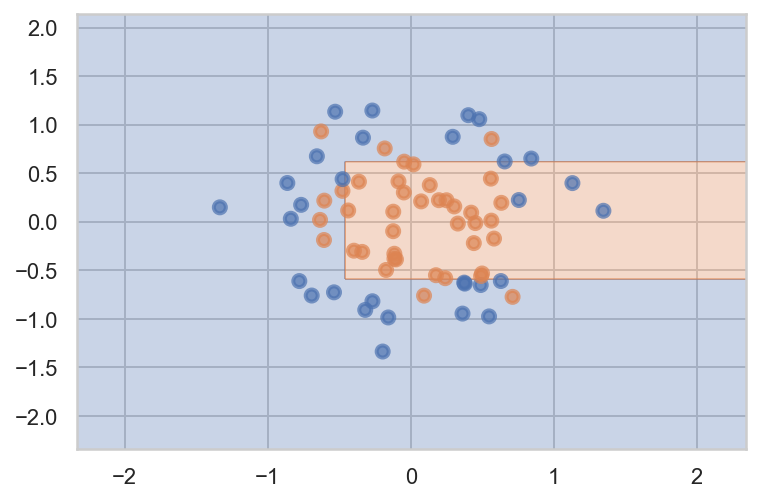

train accuracy: 0.8285714285714286
test accuracy: 0.8

Max dept: 6; Min samples in leaf: 9


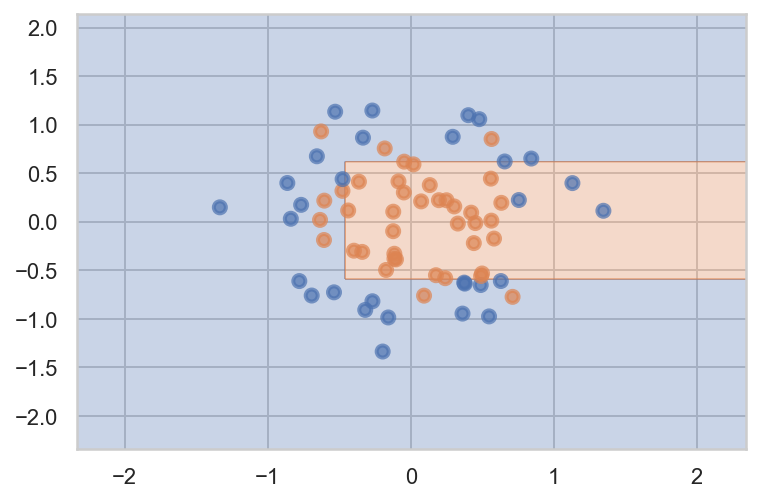

train accuracy: 0.8285714285714286
test accuracy: 0.8

Max dept: 6; Min samples in leaf: 11


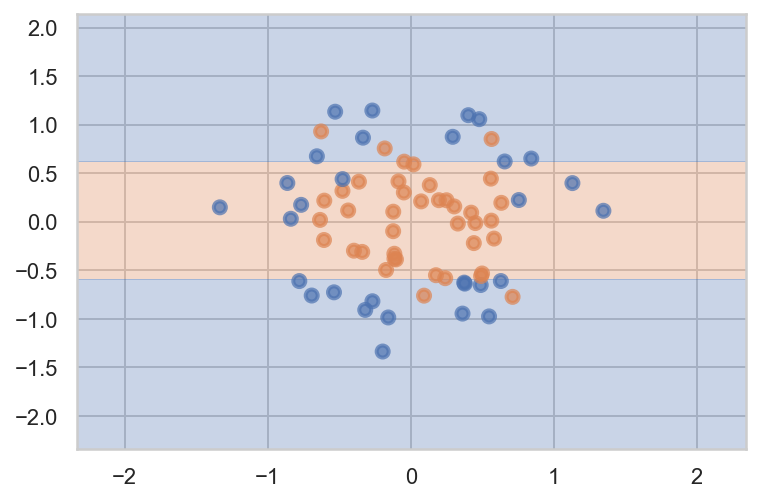

train accuracy: 0.8142857142857143
test accuracy: 0.6666666666666666

Dataset 2
Max dept: 3; Min samples in leaf: 5


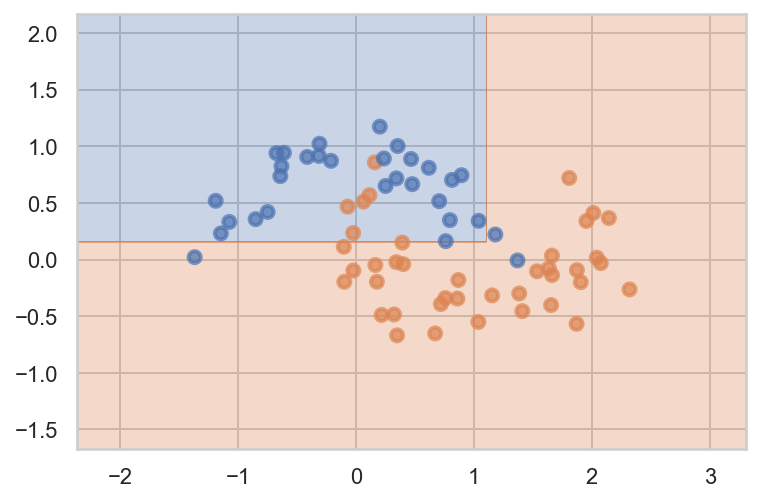

train accuracy: 0.8857142857142857
test accuracy: 0.8

Max dept: 3; Min samples in leaf: 7


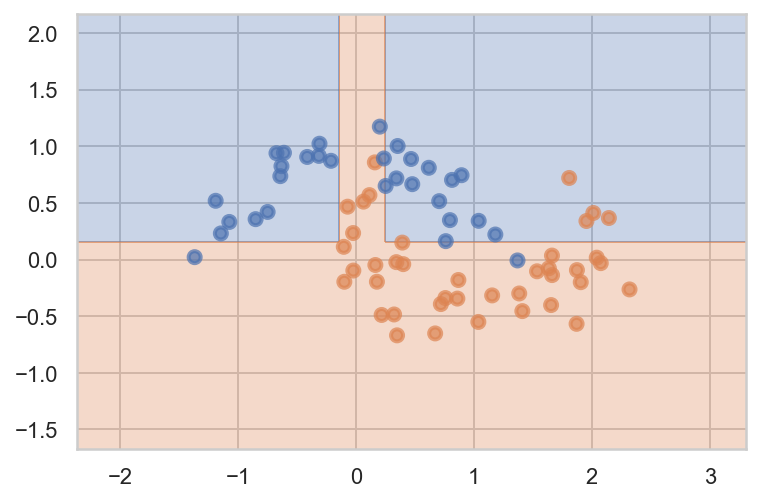

train accuracy: 0.8857142857142857
test accuracy: 0.7333333333333333

Max dept: 3; Min samples in leaf: 9


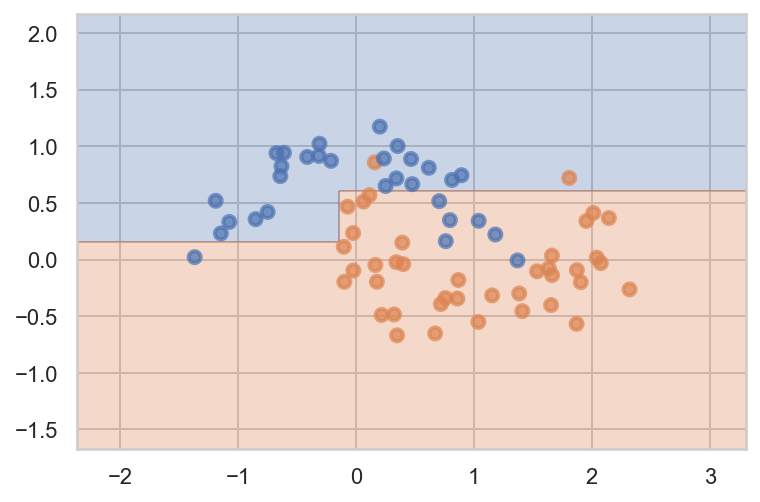

train accuracy: 0.8714285714285714
test accuracy: 0.7666666666666667

Max dept: 3; Min samples in leaf: 11


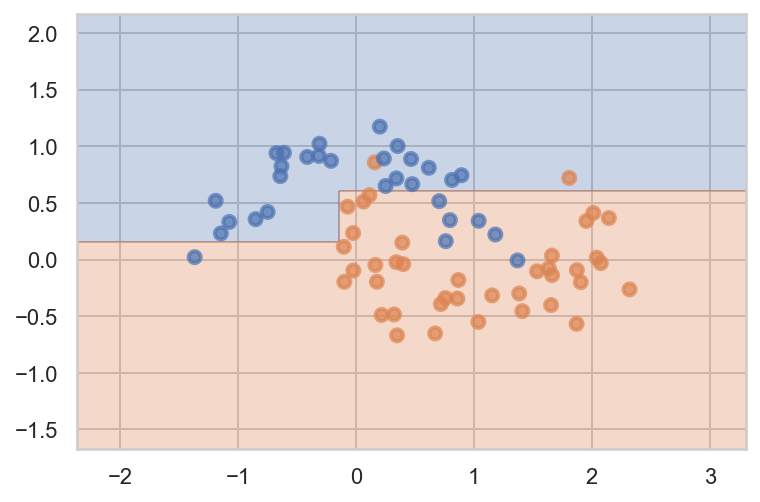

train accuracy: 0.8714285714285714
test accuracy: 0.7666666666666667

Max dept: 4; Min samples in leaf: 5


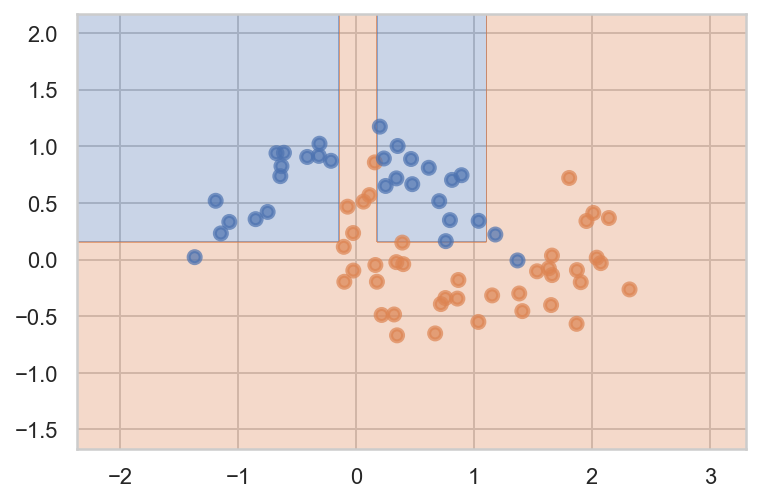

train accuracy: 0.9571428571428572
test accuracy: 0.7333333333333333

Max dept: 4; Min samples in leaf: 7


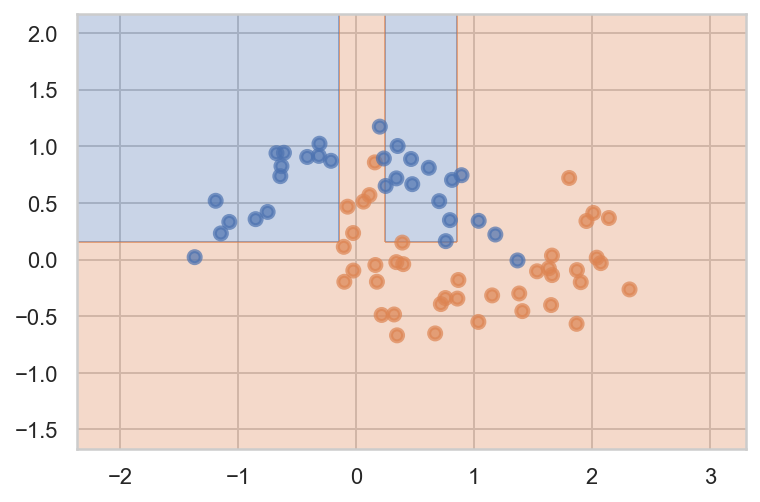

train accuracy: 0.9
test accuracy: 0.7

Max dept: 4; Min samples in leaf: 9


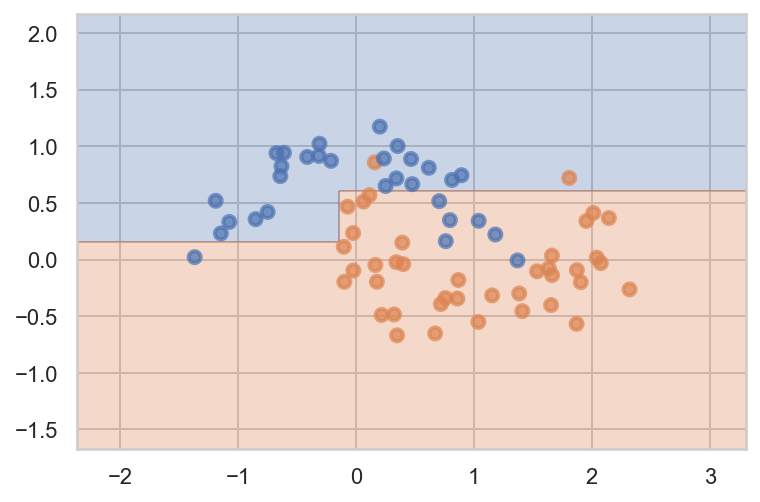

train accuracy: 0.8714285714285714
test accuracy: 0.7666666666666667

Max dept: 4; Min samples in leaf: 11


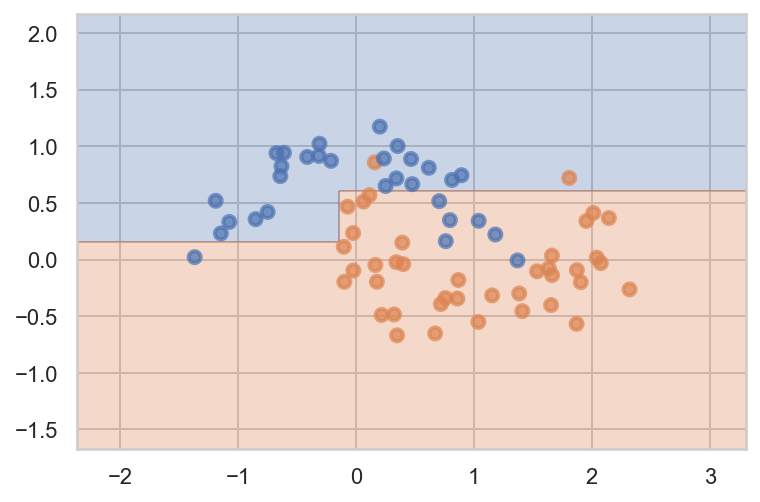

train accuracy: 0.8714285714285714
test accuracy: 0.7666666666666667

Max dept: 5; Min samples in leaf: 5


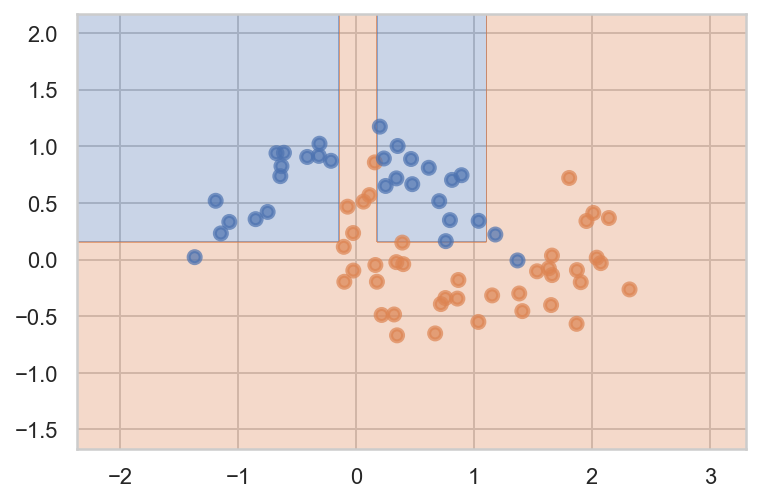

train accuracy: 0.9571428571428572
test accuracy: 0.7333333333333333

Max dept: 5; Min samples in leaf: 7


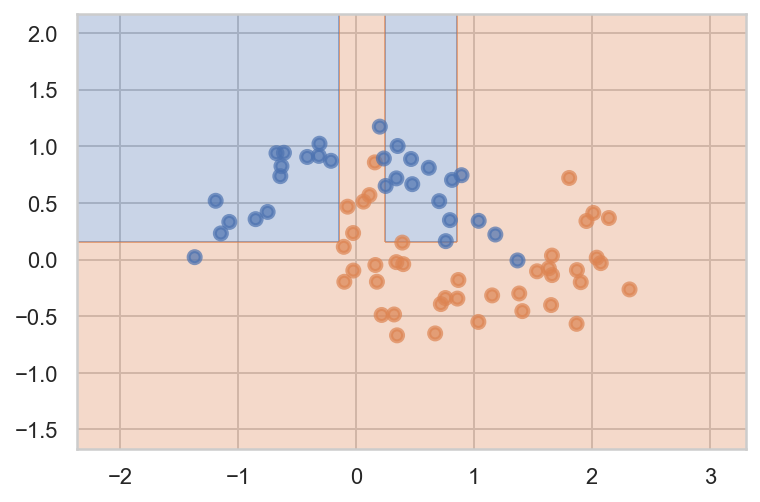

train accuracy: 0.9
test accuracy: 0.7

Max dept: 5; Min samples in leaf: 9


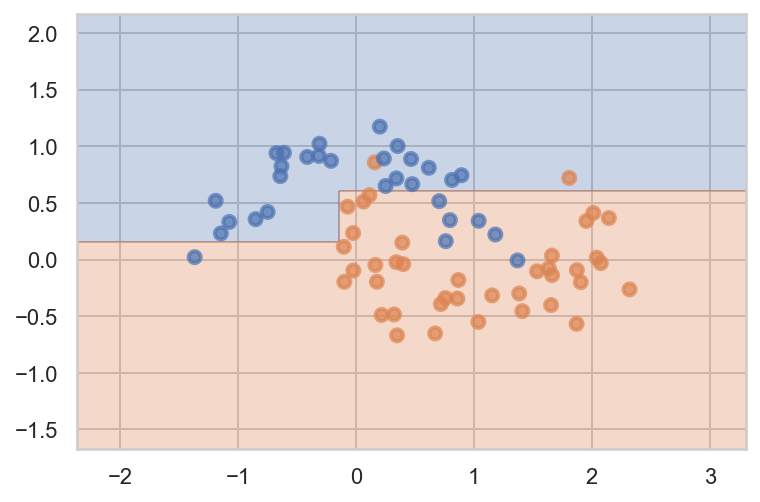

train accuracy: 0.8714285714285714
test accuracy: 0.7666666666666667

Max dept: 5; Min samples in leaf: 11


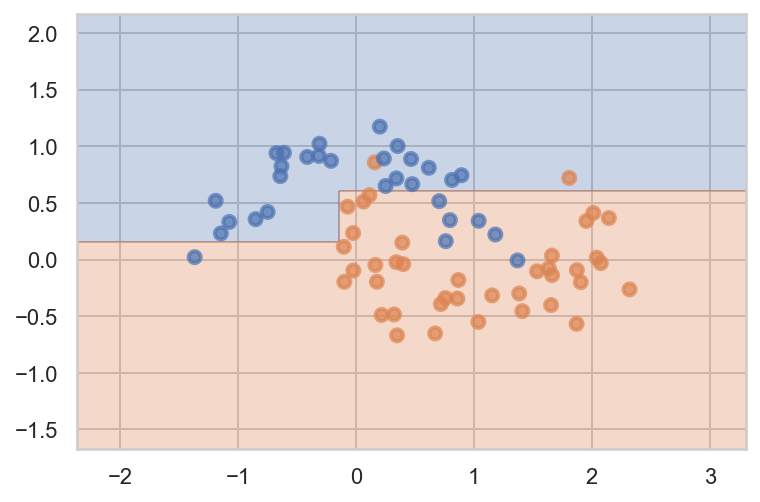

train accuracy: 0.8714285714285714
test accuracy: 0.7666666666666667

Max dept: 6; Min samples in leaf: 5


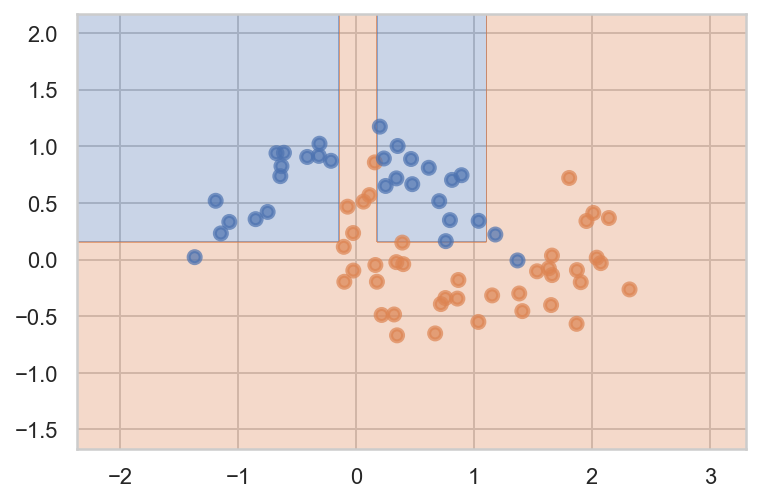

train accuracy: 0.9571428571428572
test accuracy: 0.7333333333333333

Max dept: 6; Min samples in leaf: 7


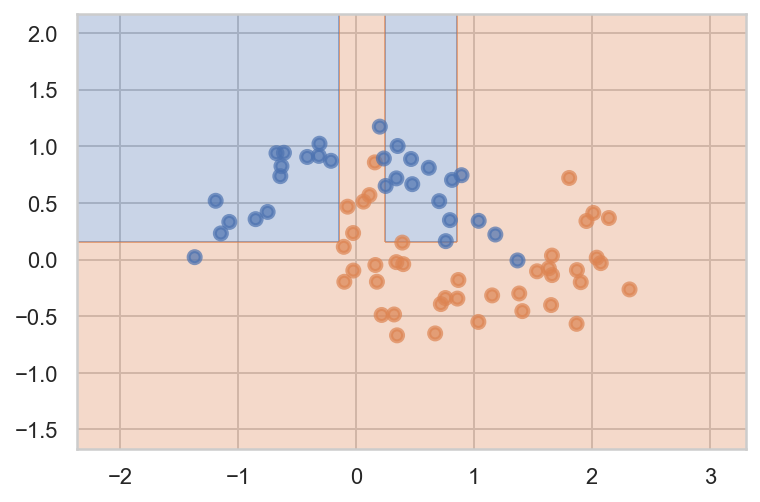

train accuracy: 0.9
test accuracy: 0.7

Max dept: 6; Min samples in leaf: 9


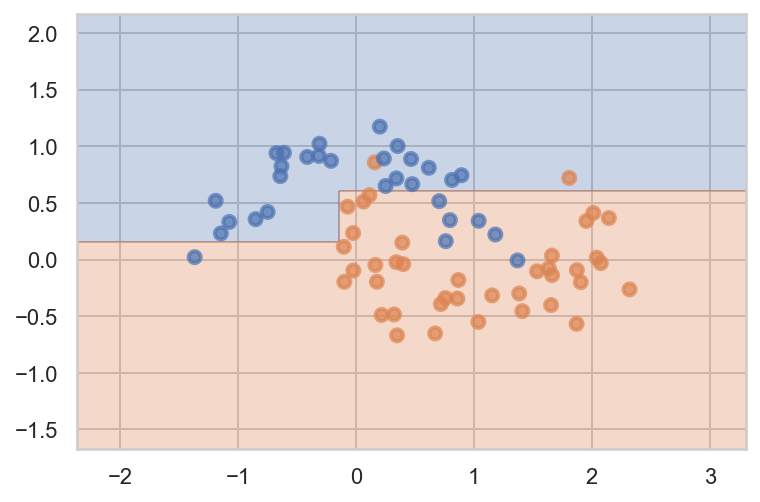

train accuracy: 0.8714285714285714
test accuracy: 0.7666666666666667

Max dept: 6; Min samples in leaf: 11


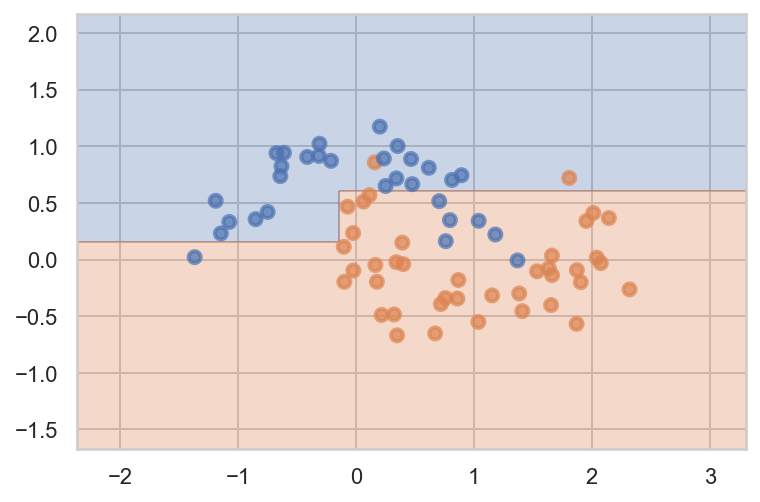

train accuracy: 0.8714285714285714
test accuracy: 0.7666666666666667

Dataset 3
Max dept: 3; Min samples in leaf: 5


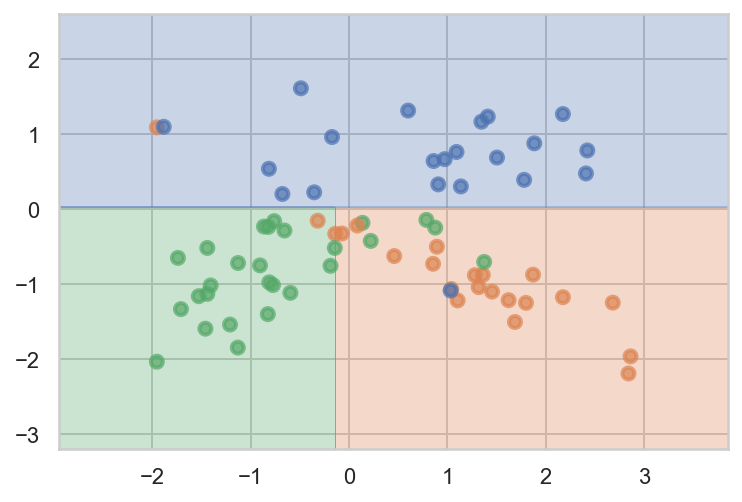

train accuracy: 0.8857142857142857
test accuracy: 0.7666666666666667

Max dept: 3; Min samples in leaf: 7


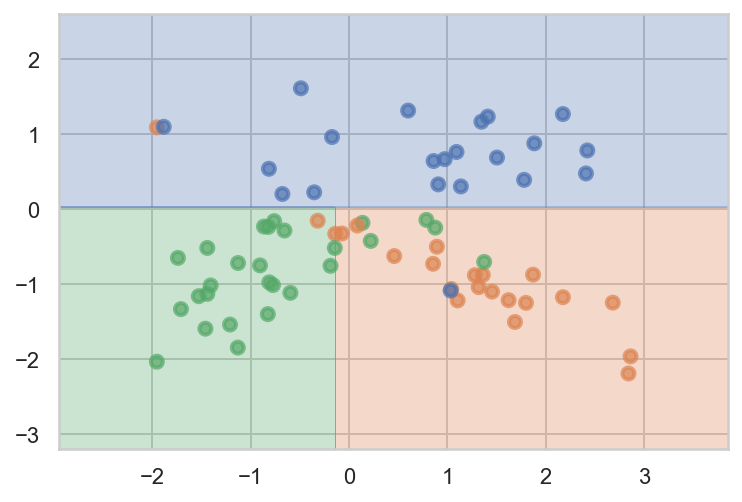

train accuracy: 0.8857142857142857
test accuracy: 0.7666666666666667

Max dept: 3; Min samples in leaf: 9


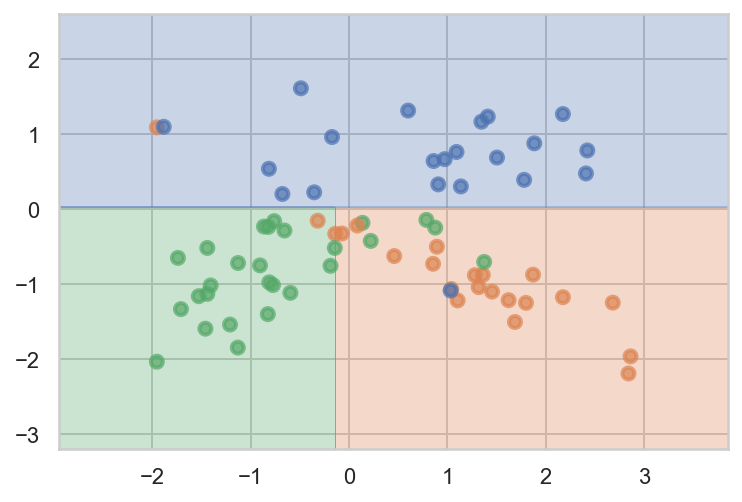

train accuracy: 0.8857142857142857
test accuracy: 0.7666666666666667

Max dept: 3; Min samples in leaf: 11


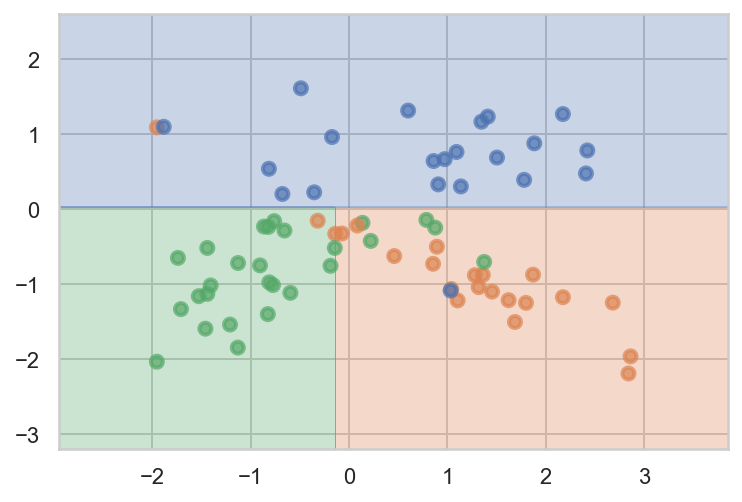

train accuracy: 0.8857142857142857
test accuracy: 0.7666666666666667

Max dept: 4; Min samples in leaf: 5


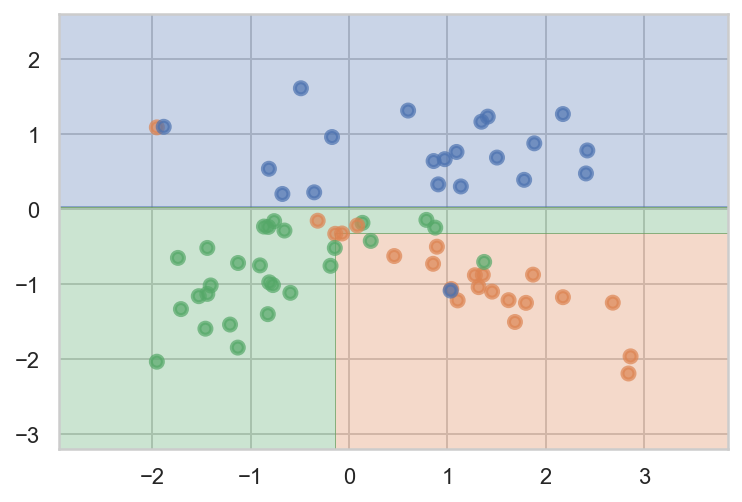

train accuracy: 0.9
test accuracy: 0.7666666666666667

Max dept: 4; Min samples in leaf: 7


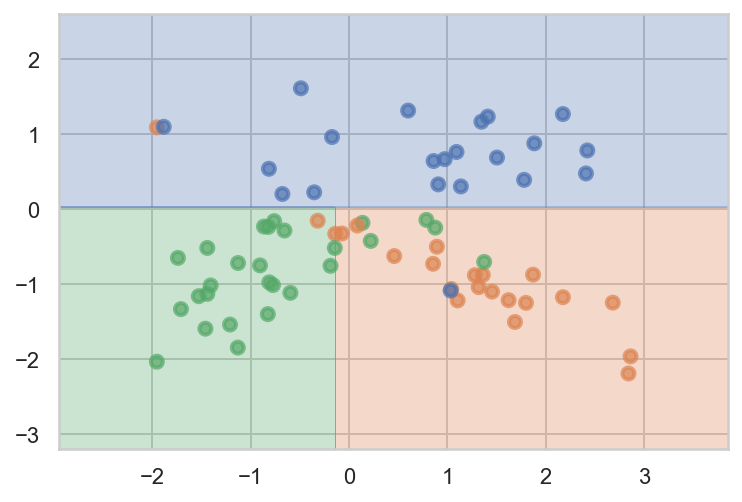

train accuracy: 0.8857142857142857
test accuracy: 0.7666666666666667

Max dept: 4; Min samples in leaf: 9


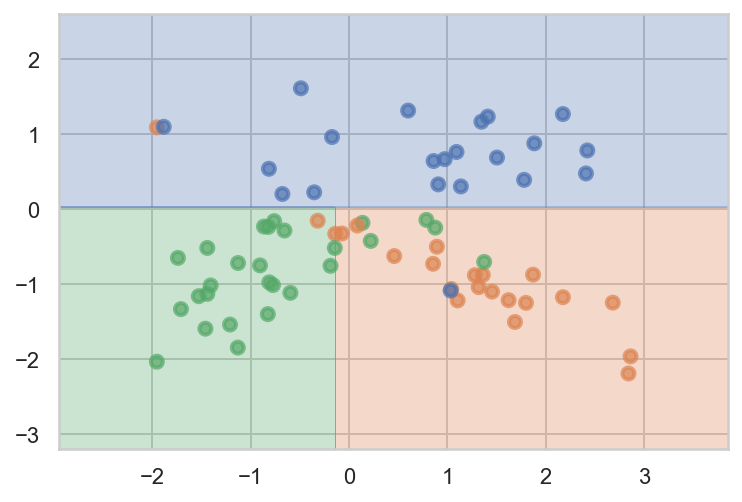

train accuracy: 0.8857142857142857
test accuracy: 0.7666666666666667

Max dept: 4; Min samples in leaf: 11


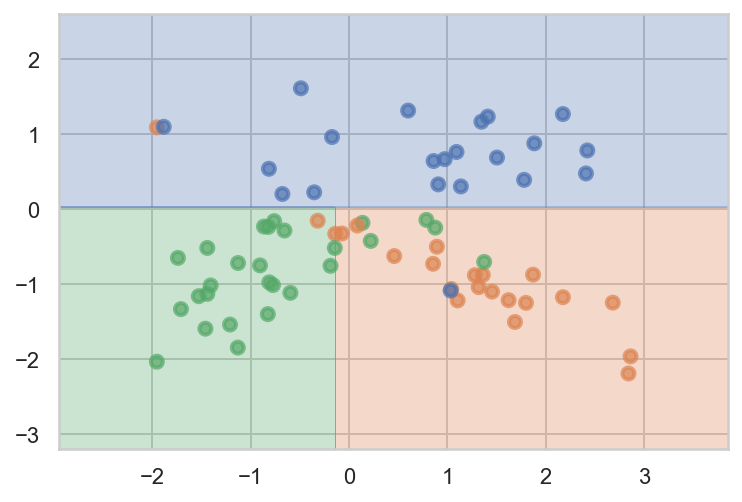

train accuracy: 0.8857142857142857
test accuracy: 0.7666666666666667

Max dept: 5; Min samples in leaf: 5


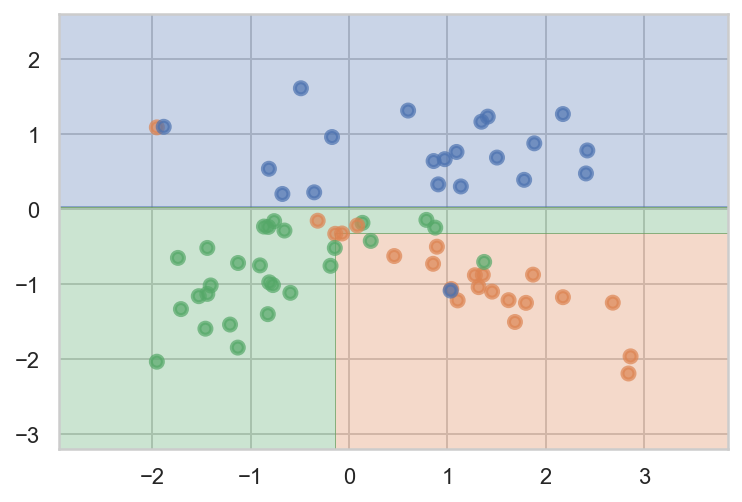

train accuracy: 0.9
test accuracy: 0.7666666666666667

Max dept: 5; Min samples in leaf: 7


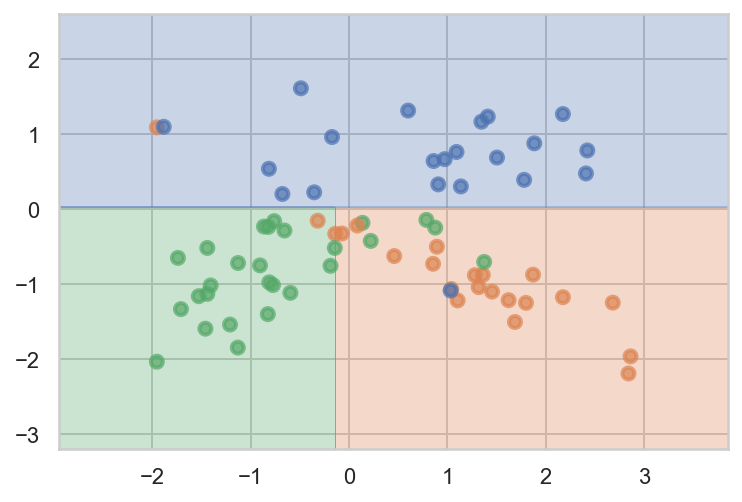

train accuracy: 0.8857142857142857
test accuracy: 0.7666666666666667

Max dept: 5; Min samples in leaf: 9


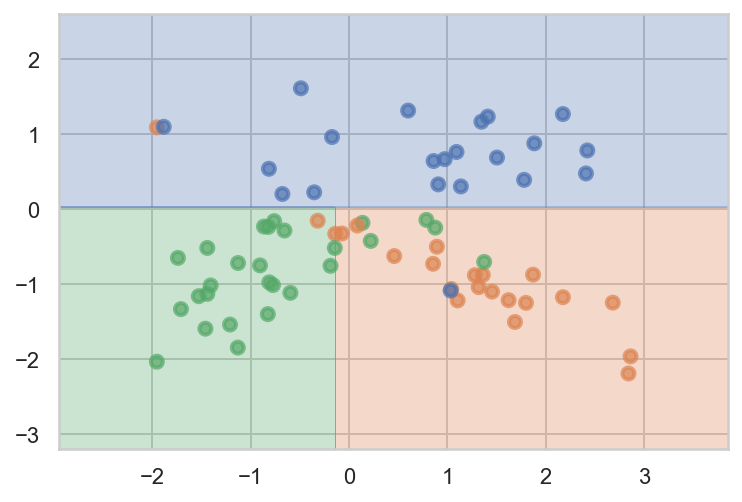

train accuracy: 0.8857142857142857
test accuracy: 0.7666666666666667

Max dept: 5; Min samples in leaf: 11


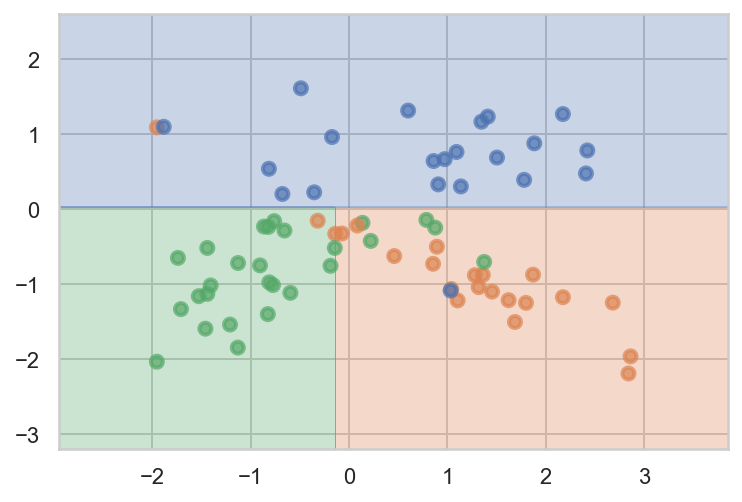

train accuracy: 0.8857142857142857
test accuracy: 0.7666666666666667

Max dept: 6; Min samples in leaf: 5


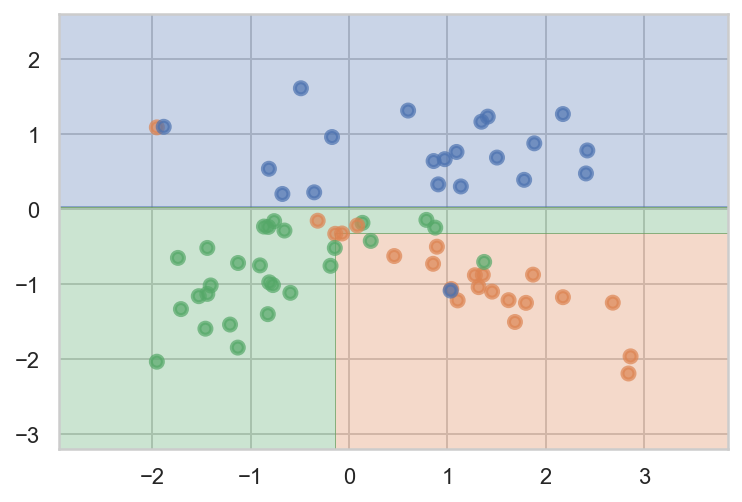

train accuracy: 0.9
test accuracy: 0.7666666666666667

Max dept: 6; Min samples in leaf: 7


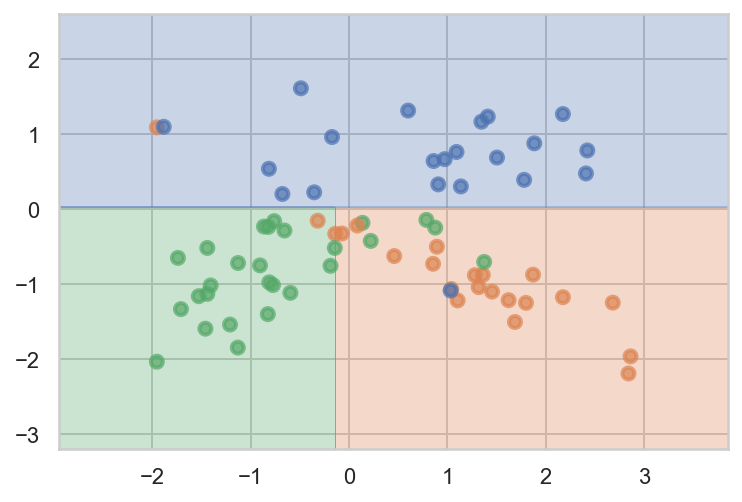

train accuracy: 0.8857142857142857
test accuracy: 0.7666666666666667

Max dept: 6; Min samples in leaf: 9


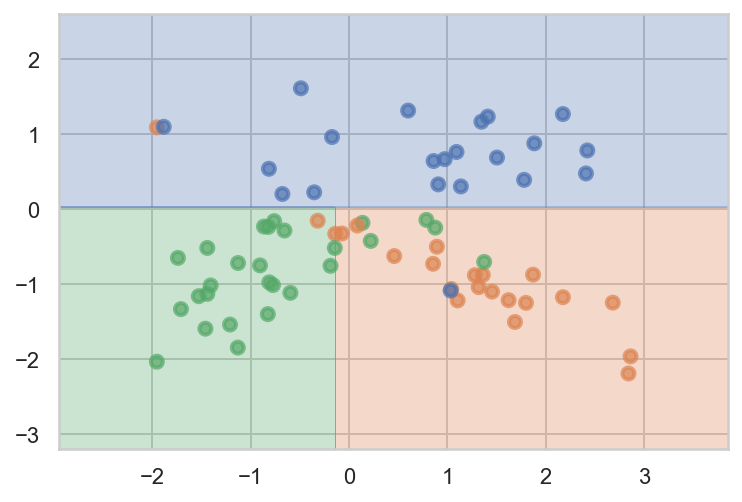

train accuracy: 0.8857142857142857
test accuracy: 0.7666666666666667

Max dept: 6; Min samples in leaf: 11


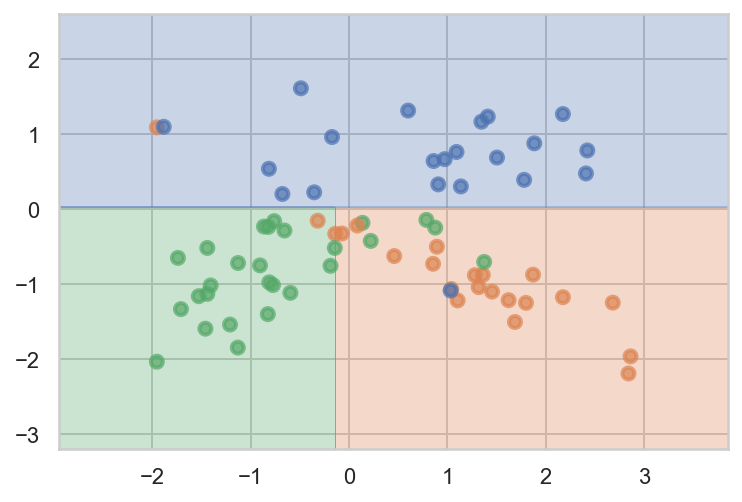

train accuracy: 0.8857142857142857
test accuracy: 0.7666666666666667



In [10]:
for i in range(3):
    X, y = datasets[i]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)
    print(f'Dataset {i+1}')
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leaves:
            print(f'Max dept: {max_depth}; Min samples in leaf: {min_samples_leaf}')
            clf  = DecisionTreeClassifier(max_depth=max_depth, 
                                          min_samples_leaf=min_samples_leaf).fit(X_train, y_train)
            plot_surface(clf, X_train, y_train)
            plt.show()
            print(f'train accuracy: {accuracy_score(clf.predict(X_train), y_train)}')
            print(f'test accuracy: {accuracy_score(clf.predict(X_test), y_test)}', end='\n\n')

__Ответ:__ Как видно на графиках выше, для каждого датасета подходят свои параметры
1. На первом датасете все работает идеально - при минимальном количестве объектов в листе 5 и максимальной глубиной 4-6 `accuracy` на тесте составляет 0.9, хотя на тренировочной выборке она ниже. Разделяющая поверхность для этих случаев также показывает, что переобучения нет, и разделение получилось очень хорошее.
2. Со вторым датасетом все несколько сложнее, тк на нем не удалось добиться идеального разбиения. В лучшем случае получается, что либо кусок синей части заползает в оранжевую зону, либо наоборот, либо в синей области возникает оранжевая полоса. Лучший результат по `accuracy=0.8` наблюдался при максимальной глубине 3 и минимальном числе объектов в листе, равном 5.
3. Для третьего датасета также не удалось добиться очень хорошего разделения, и скорее всего это связано с тем, что классы в нем сильно пересекаются. Тем не менее, практически для всех из перебираемых значений параметров видно, что переобучения не происходит и поверхность ровно делится на три области. `accuracy` при этом составляет не выше 0.77.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балла)__

Реализуйте функцию find_best_split из модуля hw5code.py. 

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [11]:
# !wget https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv --no-check-certificate
data = pd.read_csv('students.csv')
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [12]:
from hw5code import *

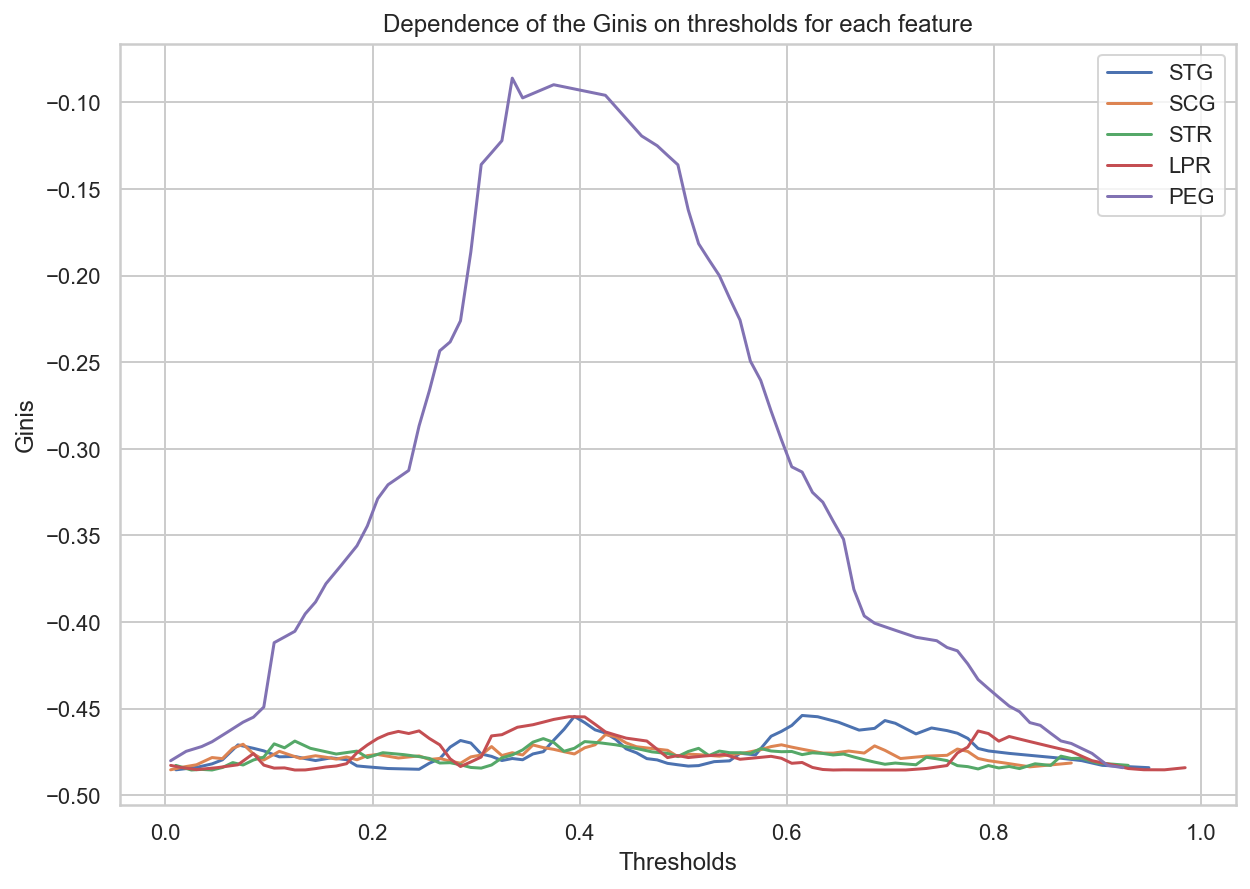

In [13]:
plt.rcParams['figure.figsize'] = 10, 7
plt.rcParams['font.size'] = 14
for col in data.drop(' UNS', axis=1).columns:
    thresholds, ginis, _, _ = find_best_split(data[col].to_numpy(), data[' UNS'].to_numpy())
    plt.plot(thresholds, ginis, label=col)

plt.legend()
plt.xlabel("Thresholds")
plt.ylabel("Ginis")
plt.title('Dependence of the Ginis on thresholds for each feature')
plt.show()

In [14]:
# лучшее разделение по лучшему признаку (порог и Джини)
find_best_split(data['PEG'].to_numpy(), data[' UNS'].to_numpy())[-2::]

(0.335, -0.08606560274912146)

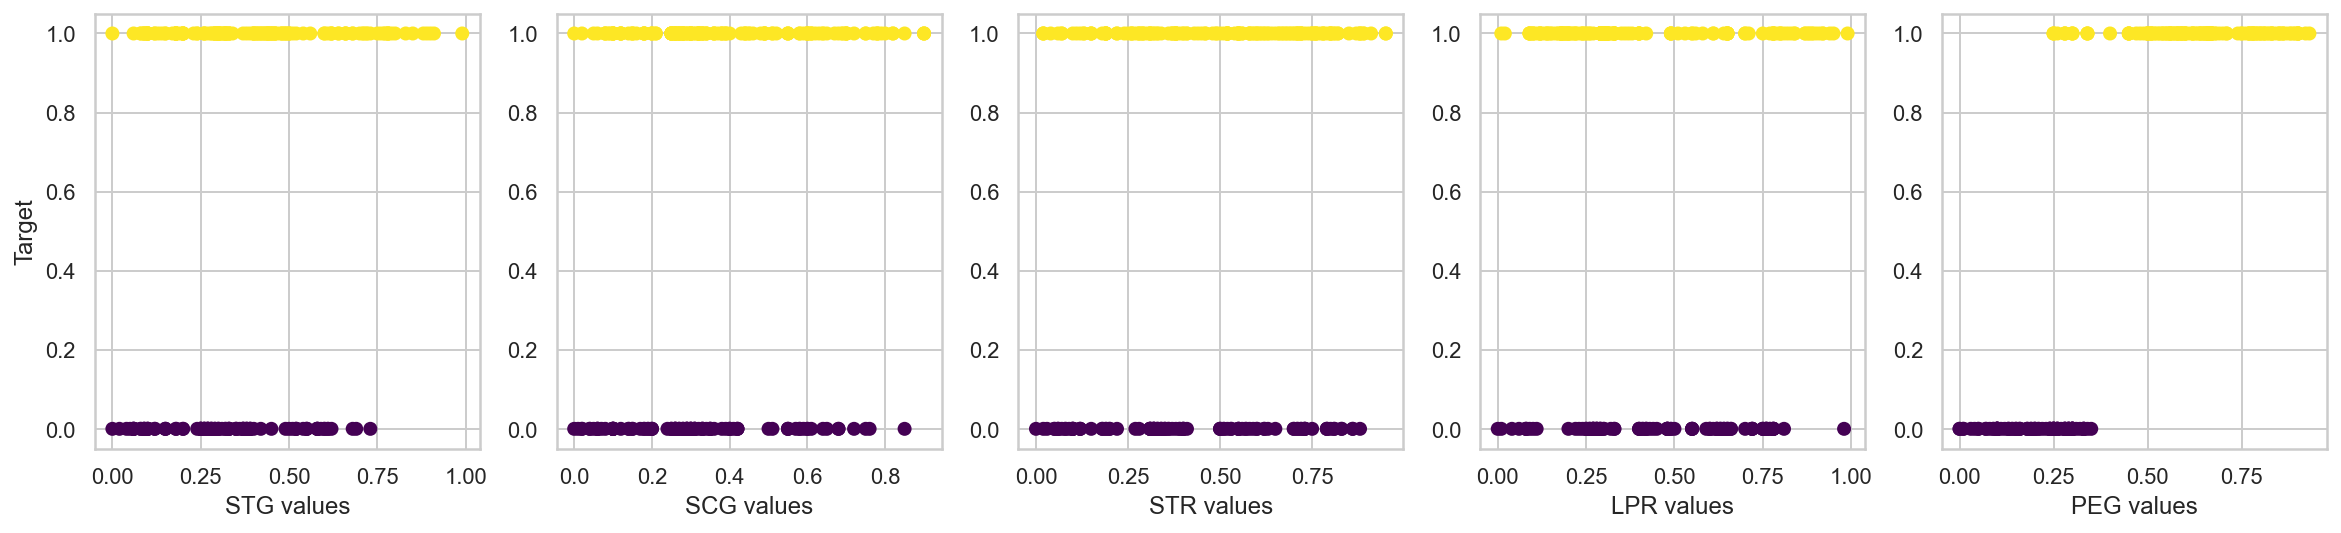

In [15]:
plt.rcParams['figure.figsize'] = 5, 3.5
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
for i in range(5):
    col = data.drop(' UNS', axis=1).columns[i]
    axs[i].scatter(data[col], data[' UNS'], c=data[' UNS'], cmap='viridis')
    axs[i].set_xlabel(f"{col} values")
axs[0].set_ylabel("Target")
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? 
- Максимальное значение критерия Джини достигается кривой по признаку `PEG` при значении порога равном 0.335. Это значит, что именно по этому признаку следует производить деление выборки на два поддерева, тк в одном из них окажутся почти все нули, а в бругом - почти все единицы.

Согласуется ли этот результат с визуальной оценкой scatter-графиков?
- Да, это идеально согласуется со scatter-графиками. Все объекты с ответами 0 лежат слева от порога, а бОльшая часть объектов со ответами 1 - справа. Деление почти идеальное, присуствует лишь малая область значений признака, в которой присуствовали и нулевые, и единичные объекты. У остальных признаков даже и близко такого четкого разделения не наблюдается.

Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? 
- Такая кривая имеет пик на одном из значений порогов. До этого пика значение критерия постепенно возрастает, а после него - убывает. Получается как бы такая "горка". Максимум при этом может достигаться в любых значениях порога. Также может оказаться, что несколько порогов хорошо делят выборку, тогда кривая будет выглядеть как несколько "горок", то есть будет иметь несколько пиков. Тогда в один этап разделить не получится, и пороги будут выставляться в несколько этапов. Чем меньше область значений признака, содержащая оба класса, тем выше пик.

Чем отличаются кривые для признаков, по которым деление практически невозможно?
- Они больше напоминают прямые, чем параболы, содержат несколько практически одинаково высоких пиков, разброс значений у них не велик.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [16]:
data = pd.read_csv("agaricus-lepiota.data", sep=',')

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    le.fit(data[col])
    data[col] = le.transform(data[col])

In [18]:
from sklearn.model_selection import train_test_split
X = data.drop('p', axis=1)
y = data['p']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=777)

In [19]:
# типы признаков
types = np.array(['categorical'] * len(X.columns))

In [20]:
tree = DecisionTree(types)
tree.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = tree.predict(X_test.to_numpy())

In [21]:
from sklearn.metrics import accuracy_score
print('accuracy: {:1f}'.format(accuracy_score(y_pred, y_test.to_numpy())))

accuracy: 0.999015


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [22]:
# устранение проблемы с сертификатами
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [23]:
data_mushrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')
data_tic = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data')
data_cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')
data_nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')

In [24]:
data_nursery

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
...,...,...,...,...,...,...,...,...,...
12954,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12956,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [25]:
# словарь с датасетами
# удобно так хранить Х и у, чтобы по ним итерироваться
datasets = {
    'mushrooms': [0, 0],
    'tic-tac-toe': [0, 0],
    'cars': [0, 0],
    'nursery': [0, 0]
}
X = 0
y = 1
le = LabelEncoder()

# отдельно зададим для каждого датасета Х и у, тк не везде это можно сделать одинаково
datasets['mushrooms'][X] = data_mushrooms.drop('p', axis=1)
datasets['mushrooms'][y] = le.fit_transform(data_mushrooms['p'])

datasets['tic-tac-toe'][X] = data_tic.drop('positive', axis=1)
datasets['tic-tac-toe'][y] = le.fit_transform(data_tic['positive'])

datasets['cars'][X] = data_cars.drop('unacc', axis=1)
datasets['cars'][y] = data_cars["unacc"].map(lambda x: x == "good" or x == 'vgood').astype(int).to_numpy()

datasets['nursery'][X] = data_nursery.drop('recommend', axis=1)
datasets['nursery'][y] = data_nursery["recommend"].map(lambda x: not(x == "not_recom" or 
                                                                     x == 'recommend')).astype(int).to_numpy()

In [26]:
# таблица с результатами эксперимента
results = pd.DataFrame({'my_all_real': [0., 0., 0., 0.], 
                        'my_all_cat': [0., 0., 0., 0.],
                        'my_real_and_ohe': [0., 0., 0., 0.],
                        'skl_all_real': [0., 0., 0., 0.], 
                        'skl_all_cat': [0., 0., 0., 0.],
                        'skl_real_and_ohe': [0., 0., 0., 0.],
                        'index': list(datasets.keys())
                       })
results = results.set_index('index')
# названия методов, которые будут рассматриваться 
methods = ['all_real', 'all_cat', 'real_and_ohe']

In [27]:
# функция для label encoding датасета
def le_data(X):
    le = LabelEncoder()
    X_ = X.copy()
    for col in X.columns:
        X_[col] = le.fit_transform(X_[col])
    return X_.to_numpy()

In [28]:
# функция для назначения дерева по значению переменной est
# нужна, чтобы не прописывать условия по est в коде ниже
def tree(est, types):
    if est == 'my_':
        return DecisionTree(types)
    elif est == 'skl_':
        return DecisionTreeClassifier()

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder

# different estimators: own and sklearn
for est in ['my_', 'skl_']:
    # different datasets
    for dataset in results.index:
        # different methods
        for method in methods:
            if method == 'all_real':
                types = np.array(['real'] * len(datasets[dataset][X].columns))

                results[est + method][dataset] = np.round(np.mean(cross_val_score(estimator=tree(est, types),
                                                                        X=le_data(datasets[dataset][X]),
                                                                        y=datasets[dataset][y],
                                                                        cv=10,
                                                                        scoring=make_scorer(accuracy_score))), 3)
            elif method == 'all_cat':
                types = np.array(['categorical'] * len(datasets[dataset][X].columns))

                results[est + method][dataset] = np.round(np.mean(cross_val_score(estimator=tree(est, types),
                                                                        X=le_data(datasets[dataset][X]),
                                                                        y=datasets[dataset][y],
                                                                        cv=10,
                                                                        scoring=make_scorer(accuracy_score))), 3)
            elif method == 'real_and_ohe':
                x = OneHotEncoder(sparse=False).fit_transform(datasets[dataset][X])
                types = np.array(['categorical'] * len(x))

                results[est + method][dataset] = np.round(np.mean(cross_val_score(estimator=tree(est, types),
                                                                        X=x,
                                                                        y=datasets[dataset][y],
                                                                        cv=10,
                                                                        scoring=make_scorer(accuracy_score))), 3)

In [30]:
results

,my_all_real,my_all_cat,my_real_and_ohe,skl_all_real,skl_all_cat,skl_real_and_ohe
index,,,,,,
mushrooms,0.999,1.000,1.000,0.958,0.967,0.968
tic-tac-toe,0.468,0.548,0.552,0.760,0.780,0.800
cars,0.940,0.968,0.922,0.945,0.945,0.824
nursery,1.000,1.000,1.000,1.000,1.000,1.000


__Задание 10. (1 балл)__

Проанализируйте результаты эксперимента. 

__Ответ:__ 
- Датасет: `mushrooms`. Для этого датасета практически везде accuracy равно 1. Наилучшие результаты показали эксперименты, в котороых все признаки категориальные или все признаки вещественные, но закодированные OHE. Это логично, так как признаки, действительно, категориальные, и при OHE для всех признаков существует единственный порог, равный 0.5, поэтому то, что признаки вещественные, не играет никакой роли при наличии OHE. При этом самодельное дерево показало гораздо более хороший результат, чем дерево от `sklearn`.
- Датасет: `tic-tac-toe`. У данного датасета результаты самые плохие. Класс `DecisionTree` дал совсем плохие результаты, особенно для чисто вещественных признаков, в то время как самый лучший результат показало one-hot кодирование с классификацией `DecisionTreeClassifier`. Логично, что было не лучшей идеей делать позиции в игре крестики-нолики вещественными признаками, поэтому самый плохой результат находится именно в столбце `'my_all_real'`.
- Датасет: `cars`. Для этого датасета лучшим методом оказался `my_all_cats`, что в принципе можно объяснить. Во-первых, все признаки скорее категориальные, чем вещественные, поэтому их обработка как категориальных показала результат получше. Во-вторых, хотя признаки делятся на категории, некоторые из них можно упорядочить, поэтому one-hot кодирование показало результат хуже, чем использование label encoding и обработку как категориальных признаков. Классификатор sklearn показал одинаковые результаты для label-encoding, и самый худших результат для one-hot кодирования по описаным выше причинам.
- Датасет: `nursery`. Для всех методов данный датасет показал практически идеальный результат, хотя на кросс-валидации встречались значения в районе 0.999. Это говорит о том, что дерево очень хорошо справляется с задачей и ошибается на очень малом числе объектов. Так происходит из-за того, что признак `recommended` очень сильно связан с целевой переменной.

Одинаково ли для разных наборов данных ранжируются алгоритмы? Порассуждайте, почему так происходит. 
- __Ответ:__ Для разных наборов данных алгоритмы ранжируются совершенно по-разному и дают очень разные показатели качества в результате. К примеру, в датасете nursery вообще нет разницы, какой алгоритм выбрать, в то время как для датасета крестики-нолики разница очень большая! Дело чаще всего в данных и том, какой алгоритм для них больше всего подойдет. К примеру, для датасета "крестики-нолики" лучшим алгоритмом оказался классификатор sklearn с one-hot кодированием, в то время как в датасете с машинами лучший результат у DecisionTree с label encoding и категориальными признаками. Почему эти алгоритмы лучше всего подошли для этих датасетов - описано выше. Для данных только с порядковыми признаками лучше подойдет `my_all_real`, в то время как только с категориальными может подойти как one-hot кодирование, так и label encoding с обработкой признаков как категориальных. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? Можно ли повлиять на нее и улушить работу алгоритмов?
- __Ответ:__ Да, в результатах однозначно присутствует компонента случайности, и это отчетливо видно на результатах. Дело в том, что на вход `skl_all_real` и `skl_all_cat` подавались абсолютно одинаковые датасеты, так как отличие этих методов только в переменной `types`, которая в данных экспериментах никак не использовалась. Получается, результаты получились разные только из-за того, что разные подвыборки попадались во время кросс-валидации. На остальных датасетах это не заметно, но если посмотреть, какие результаты получаются после кросс-валидации до усреднения, то можно увидеть, что они в принципе тоже разнятся. Что с этим делать - например, можно следить, чтобы при разбиении выборки на тренировочную и тестовую во время кросс-валидации распределение целевой переменной и там, и там было одинаковым.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

<img src="kinda_tired.gif" width="450" align="center">